In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def line(i1,j1,i2,j2):
    
    if abs(i2-i1) >= abs(j2-j1):
        if i1 > i2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        i = np.arange(i1+1,i2+1)
        j = (j2-j1)/(i2-i1)*(i-i1)+j1
    else:
        if j1 > j2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        j = np.arange(j1+1,j2+1)
        i = (i2-i1)/(j2-j1)*(j-j1)+i1
    
    return np.ceil(i).astype(int),np.ceil(j).astype(int)


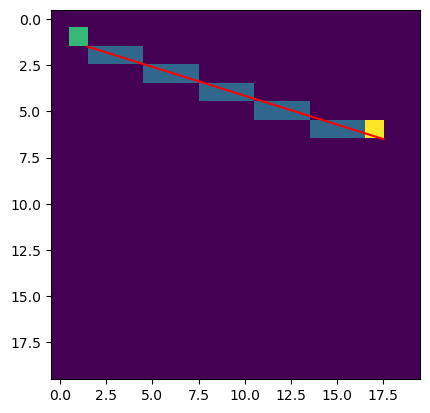

In [119]:
A = np.zeros((20,20))
i1,j1,i2,j2 = 1,1,6,17
i,j = line(i1,j1,i2,j2)
A[[i1,i2],[j1,j2]]+=2
A[i,j] += 1
plt.imshow(A)
plt.plot([j1+0.5,j2+0.5],[i1+0.5,i2+0.5],'r')
plt.show()

In [153]:
#B = np.zeros((5,5))
C=np.array(np.nonzero(B))


In [160]:
tuple(C[:,0])

(2, 2)

In [ ]:
def box_search(A,i,j,win_size):
        r = (win_size-1)/2
        try:
            inds = np.array(np.nonzero(A[i-r:i+r,j-r:j+r])) #Indbygget np funktion, kan måske gøres hurtigere
            return inds[:,0] if inds.size else 0
        except IndexError:
             # Indsæt edge detection her
             return 0


def branch_cut(residuals,max_win_size=None):

    branch_cuts = np.zeros(residuals.shape).astype(bool)
    #active = np.zeros(residuals.shape).astype(bool)
    inactive = residuals.astype(bool)
    balanced = np.zeros(residuals.shape).astype(bool)

    if max_win_size is None:
         max_win_size = np.min(residuals.size)
    
    for i in range(residuals.shape[0]):
        for j in range(residuals.shape[1]):

            if inactive[i,j] and not balanced[i,j]:
                inactive[i,j] = False
                charge = residuals[i,j]
                win_size = 3
                m,n = i,j
                while charge:
                    
                    while win_size <= max_win_size:
                        res_ind = box_search(inactive,m,n,win_size)
                        if res_ind:
                            m_n,n_n = res_ind[0],res_ind[1]
                            break

                        win_size+=2

                    # Place branch cut
                    i_bc,j_bc = line(m,n,m_n,n_n)
                    branch_cuts[i_bc,j_bc] = 1

                    # Set found residual to active and update charge
                    inactive[m_n,n_n] = False
                    charge += residuals[m_n,n_n]
                    m,n = m_n,n_n
                    
                balanced[i,j] = 1
                






  

